The goal of this code is to use the same dataset of motor cortex signals measured from monkeys during a behavorial task to predict reaching direction. In this code we focused on using dimensionality reduction to view the neuronal signals via PCA. We then viualize the principal components and see that for the 8 distinct reaching directions we can see clear clusters in 3D space.
Download data at: https://drive.google.com/file/d/1yxycfrB3JVFf8eN_nYH9svqN-yDcFYAM/view?usp=sharing

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

# Load data and intialize variables
data = np.load('ReachData.npz',allow_pickle=True)
r = data['r']
cfr = data['cfr']-1
num_trials = 1127
num_neurons = 190
num_directions = 8
num_training_trials = 50
num_test_trials = num_trials - (num_directions*num_training_trials)

# Define times
timeTouchHelds = np.asarray([o.timeTouchHeld for o in r])
timeGoCues = np.asarray([o.timeGoCue for o in r])
timeTargetAcquires = np.asarray([o.timeTargetAcquire for o in r])

# Window Boundaries
start_window = np.sum((timeTouchHelds, 50), axis=0)
end_window = np.sum((start_window, 200), axis=0)
plan_window = np.vstack((start_window, end_window))

# Window lengths in seconds
plan_window_len = (np.diff(plan_window, axis=0)/1000)[0]

# Initialize count matrices
pw_cnt = np.zeros((num_trials, num_neurons))

# In windows, normalize to count per second
for trial in range(num_trials):
    for neuron in range(num_neurons):
        spikes = r[trial].unit[neuron].spikeTimes
        pw_cnt[trial, neuron] = np.sum((plan_window[0, trial] <= spikes)& 
                (spikes <= plan_window[1, trial]))/plan_window_len[trial]

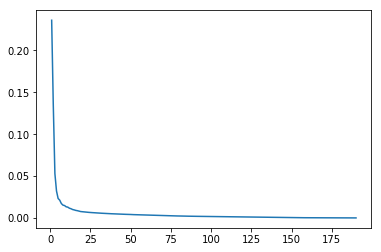

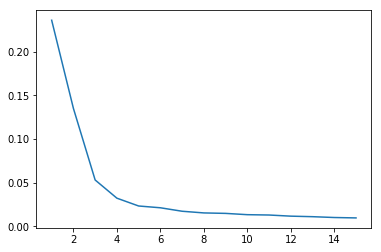

[0.23612473 0.37122525 0.42425733]


In [2]:
# Part A
plan = pw_cnt
pca = PCA(n_components=190)  # Use PCA on count matrix
pca.fit(plan)
PCA(copy=True, iterated_power='auto', n_components=190, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
# Plot explained variance of each eigen value
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_)
plt.show()
plt.plot(range(1, 16), pca.explained_variance_ratio_[0:15])
plt.show()

print(np.cumsum(pca.explained_variance_ratio_)[0:3])
# I would say at about 5 eigen values we see the knee of the plot
# The amount of vairance explained in only 3 eigen values is 42.4%

In [3]:
# Part B
top_features = pca.components_[0:3]  # Extract top three eigen values
projected = plan.dot(top_features.T)

<IPython.core.display.Javascript object>


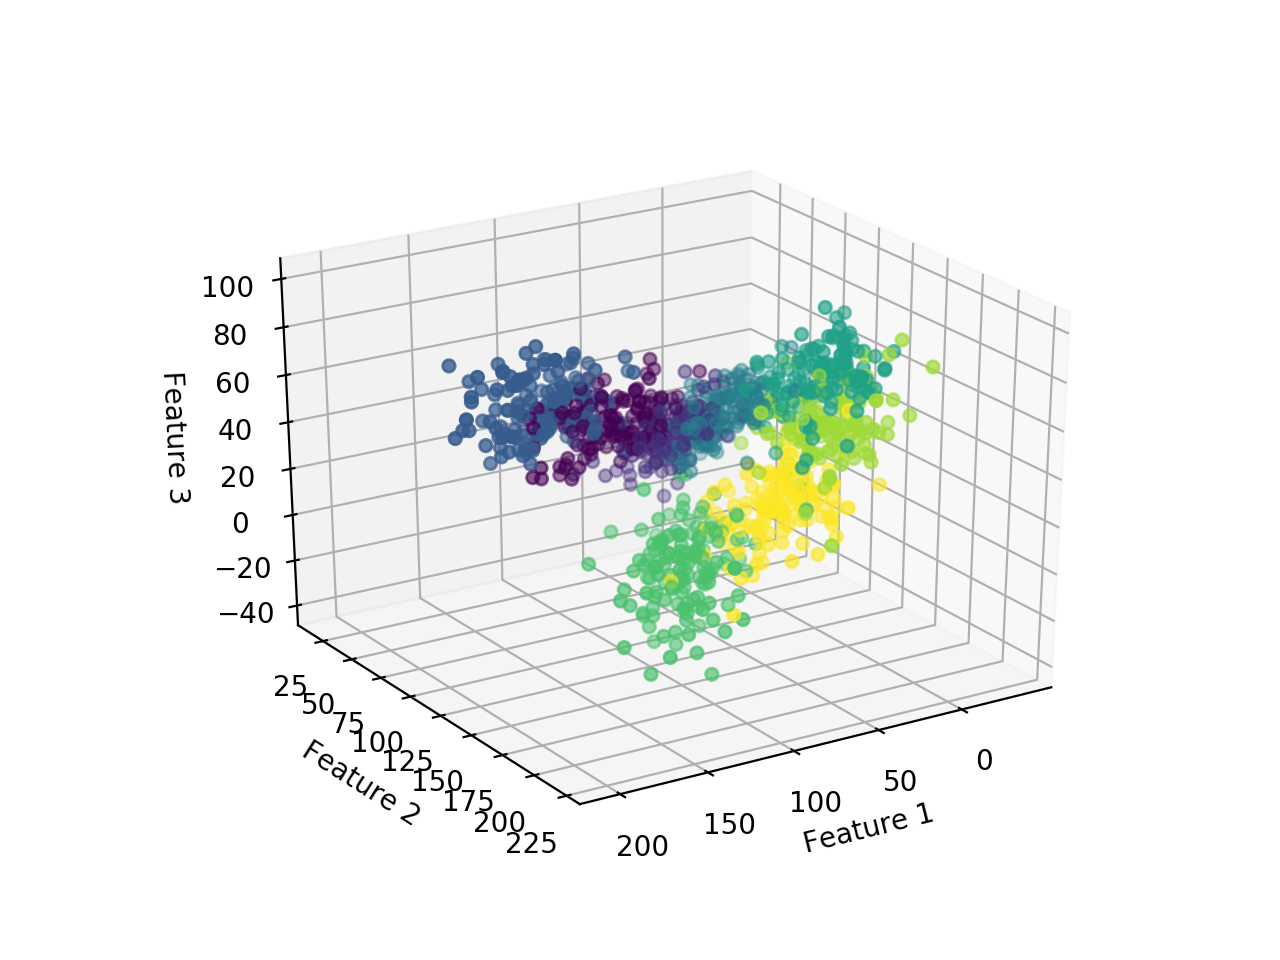

In [5]:
# 3D scatterplot
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = projected[:, 0]
y = projected[:, 1]
z = projected[:, 2]

# Color by direction
ax.scatter(x, y, z, c=5 * cfr, marker='o')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()
# I used a line of code to activate an interactive plot and then rotated it
# manually until I had some clear separation.

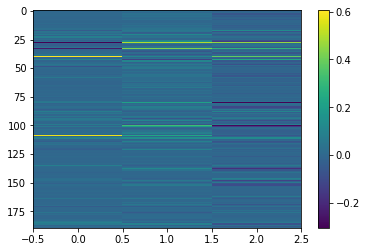

In [4]:
# Part C
plt.imshow(top_features.T, aspect='auto')
plt.colorbar()
plt.show()
# From the figure, for column 1 we see two distinct groupings 
# around neuron 40 and neuron 110
# For column 2 there are two groupings around neurons 30 and 100 
# and maybe even two more groupings at neurons 75 and 130
# For column 3 there is really only one obvious grouping at around neuron 25-45